# DS Automation Assignment

Using our prepared churn data from week 2:
- use TPOT to find an ML algorithm that performs best on the data
    - Choose a metric you think is best to use for finding the best model; by default, it is accuracy but it could be AUC, precision, recall, etc. The week 3 FTE has some information on these different metrics.
    - REMEMBER: TPOT only finds the optimized processing pipeline and model. It doesn't create the model. 
        - You can use `tpot.export('my_model_name.py')` (assuming you called your TPOT object tpot) and it will save a Python template with an example of the optimized pipeline. 
        - Use the template code saved from the `export()` function in your program.
- create a Python script/file/module using code from the exported template above that
    - create a function that takes a pandas dataframe as an input and returns the probability of churn for each row in the dataframe
    - your Python file/function should print out the predictions for new data (new_churn_data.csv)
    - the true values for the new data are [1, 0, 0, 1, 0] if you're interested
- test your Python module and function with the new data, new_churn_data.csv
- write a short summary of the process and results at the end of this notebook
- upload this Jupyter Notebook and Python file to a Github repository, and turn in a link to the repository in the week 5 assignment dropbox

*Optional* challenges:
- return the probability of churn for each new prediction, and the percentile where that prediction is in the distribution of probability predictions from the training dataset (e.g. a high probability of churn like 0.78 might be at the 90th percentile)
- use other autoML packages, such as TPOT, H2O, MLBox, etc, and compare performance and features with pycaret
- create a class in your Python module to hold the functions that you created
- accept user input to specify a file using a tool such as Python's `input()` function, the `click` package for command-line arguments, or a GUI
- Use the unmodified churn data (new_unmodified_churn_data.csv) in your Python script. This will require adding the same preprocessing steps from week 2 since this data is like the original unmodified dataset from week 1.

In [94]:
import pandas as pd
import numpy as np

In [95]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
import warnings
warnings.filterwarnings("ignore")

In [98]:
!pip install TPOT

In [99]:
!pip install xgboost

In [100]:
#import packages

from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split
import timeit

In [101]:
#load 'prepped Churn' dataframe

df = pd.read_csv('prepped_churn_data_913222.csv', index_col='customerID')
#adjust column to match new_churn_data column name
df.rename(columns = {'TotalCharges_tenure ratio':'charge_per_tenure'}, inplace=True)
df.head()

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,charge_per_tenure
customerID,,,,,,,,
7590-VHVEG,1,0,0,2,29.85,29.85,0,29.850000
5575-GNVDE,34,1,1,3,56.95,1889.50,0,55.573529
3668-QPYBK,2,1,0,3,53.85,108.15,1,54.075000
7795-CFOCW,45,0,1,0,42.30,1840.75,0,40.905556
9237-HQITU,2,1,0,2,70.70,151.65,1,75.825000


In [102]:
#Define features and targets
features = df.drop('Churn', axis=1)
targets = df['Churn']

In [103]:
#Split into train and test sets  
X_train, X_test, y_train, y_test = train_test_split(features, targets, train_size=0.7, test_size=0.3, random_state=42)

In [104]:
%%time

#runTPOTClassifier and print accuracy of test set
tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, n_jobs=-1, random_state=42)
tpot.fit(X_train, y_train)
print (tpot.score(X_test, y_test))

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8029278610044983

Generation 2 - Current best internal CV score: 0.8029278610044983

Generation 3 - Current best internal CV score: 0.8031323511204654

Generation 4 - Current best internal CV score: 0.8039435021253766

Generation 5 - Current best internal CV score: 0.8039435021253766

Best pipeline: RandomForestClassifier(input_matrix, bootstrap=False, criterion=entropy, max_features=0.25, min_samples_leaf=12, min_samples_split=5, n_estimators=100)
0.7834123222748816
CPU times: total: 1min 46s
Wall time: 2min 22s


In [105]:
from tpot import TPOTRegressor

In [106]:
%%time
#run tpot regressor and print r2 
tpotRegressor = TPOTRegressor(generations=5, population_size=50, verbosity=2, n_jobs=-1, scoring='r2', random_state=42)
tpotRegressor.fit(X_train, y_train)
print(tpotRegressor.score(X_test, y_test))

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.30449926894584023

Generation 2 - Current best internal CV score: 0.30449926894584023

Generation 3 - Current best internal CV score: 0.30449926894584023

Generation 4 - Current best internal CV score: 0.30449926894584023

Generation 5 - Current best internal CV score: 0.30449926894584023

Best pipeline: ExtraTreesRegressor(input_matrix, bootstrap=False, max_features=0.9000000000000001, min_samples_leaf=18, min_samples_split=20, n_estimators=100)
0.27134789945491267
CPU times: total: 1min 21s
Wall time: 2min 30s


The TPOTClassifier came up with a better model than the TPOTRegressor

In [118]:
#export classifer model to .py
tpot.export('TPOTClassifierModel.py')

In [108]:
#import new_churn_data
newchurndf = pd.read_csv('new_churn_data.csv', index_col='customerID')
#rename Churn column to target to work in function
df.rename(columns = {'Churn':'target'}, inplace = True)


In [109]:
df.head()

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,target,charge_per_tenure
customerID,,,,,,,,
7590-VHVEG,1,0,0,2,29.85,29.85,0,29.850000
5575-GNVDE,34,1,1,3,56.95,1889.50,0,55.573529
3668-QPYBK,2,1,0,3,53.85,108.15,1,54.075000
7795-CFOCW,45,0,1,0,42.30,1840.75,0,40.905556
9237-HQITU,2,1,0,2,70.70,151.65,1,75.825000


In [110]:
newchurndf.head()

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,charge_per_tenure
customerID,,,,,,,
9305-CKSKC,22,1,0,2,97.40,811.70,36.895455
1452-KNGVK,8,0,1,1,77.30,1701.95,212.743750
6723-OKKJM,28,1,0,0,28.25,250.90,8.960714
7832-POPKP,62,1,0,2,101.70,3106.56,50.105806
6348-TACGU,10,0,0,1,51.15,3440.97,344.097000


In [111]:
#Write function to call training data and new churn test data
#Use pipeline defined in py export file

import timeit 
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import Normalizer
from tpot.builtins import StackingEstimator
from tpot.export_utils import set_param_recursive

from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

def TPOT_Pipeline(trainingdata, testdata):
    features = trainingdata.drop('target', axis=1)
    targets = trainingdata['target']
    
    tpot_data = trainingdata.copy()
    
    training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'], random_state=42)

    # Average CV score on the training set was: 0.8039435021253766
    exported_pipeline = RandomForestClassifier(bootstrap=False, criterion="entropy", max_features=0.25, min_samples_leaf=12, min_samples_split=5, n_estimators=100)
    # Fix random state in exported estimator
    if hasattr(exported_pipeline, 'random_state'):
        setattr(exported_pipeline, 'random_state', 42)

    exported_pipeline.fit(training_features, training_target)
    results = exported_pipeline.predict(testdata)
    print(results)
    
    testing_features = testdata
    for row in range(len(testing_features)):
        resultsproba = exported_pipeline.predict_proba(testing_features)
        prob = (resultsproba[row][0]*100).round(decimals=1)
        print({testing_features.index[row]}, {prob})


In [112]:
#run function
TPOT_Pipeline(df, newchurndf)

[0 0 0 0 0]
{'9305-CKSKC'} {61.3}
{'1452-KNGVK'} {78.4}
{'6723-OKKJM'} {84.6}
{'7832-POPKP'} {72.8}
{'6348-TACGU'} {73.9}


In [117]:
#run python file
%run TPOTClassifierModel.py

[0 0 0 0 0]
{'9305-CKSKC'} {61.3}
{'1452-KNGVK'} {78.4}
{'6723-OKKJM'} {84.6}
{'7832-POPKP'} {72.8}
{'6348-TACGU'} {73.9}


In [40]:
from sklearn.metrics import classification_report

print(classification_report(y_test, tpot.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1033
           1       0.62      0.44      0.51       374

    accuracy                           0.78      1407
   macro avg       0.72      0.67      0.69      1407
weighted avg       0.76      0.78      0.77      1407



The recall is low for predicting customer churn. 

In [45]:
#Use predict proba to get probability of class 1 churn

probabilities = tpot.predict_proba(X_test)[:, 1]

In [46]:
prob_df = pd.DataFrame(data={'predicted_probability': probabilities, 'target': y_test})

<AxesSubplot:xlabel='predicted_probability', ylabel='Density'>

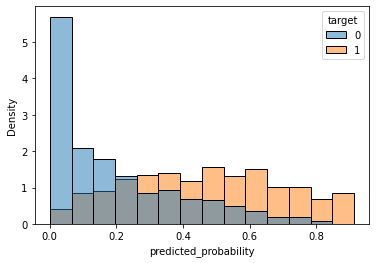

In [47]:
sns.histplot(data=prob_df, x='predicted_probability', hue='target', stat='density', common_norm=False)

The predictions are mostly good, but several low-confidence predictions below 0.5 for the occurence of customer churn

In [52]:
#index predicted_probability below 0.5 and target 

index = prob_df[(prob_df['target'] == 1) & (prob_df['predicted_probability'] < 0.5)].index
prob_df.loc[index]

,predicted_probability,target
customerID,,
1902-XBTFB,0.449331,1
9614-RMGHA,0.119801,1
4640-UHDOS,0.176066,1
4106-HADHQ,0.130348,1
9048-JVYVF,0.469597,1
...,...,...
6240-EURKS,0.260533,1
3164-AALRN,0.274341,1
0733-VUNUW,0.092895,1


In [ ]:
X_test.loc[index]

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,TotalCharges_tenure ratio
customerID,,,,,,,
1902-XBTFB,22,1,0,2,89.40,2001.50,90.977273
9614-RMGHA,65,1,0,0,91.85,5940.85,91.397692
4640-UHDOS,13,1,0,2,55.95,734.35,56.488462
4106-HADHQ,39,1,1,1,80.00,3182.95,81.614103
9048-JVYVF,3,1,0,2,69.35,191.35,63.783333
...,...,...,...,...,...,...,...
6240-EURKS,18,0,0,2,35.00,553.00,30.722222
3164-AALRN,5,1,1,3,70.00,347.40,69.480000
0733-VUNUW,24,1,0,0,55.65,1400.55,58.356250


It looks like these customers that have low probability predictions for churn also have similar values for phone service and contract.  It was determined in week 3 assignment that both phone service and contract were negatively correlated with churn.  Although, in week 4 assignment the contract was rated highly for feature importance.  It would be interesting to analyze this data again and drop phoneservice and/or contract before analyzing using TPOT.

# Summary

Write a short summary of the process and results here.

In summary an automated machine learning python file was generated using TPOT and loaded to GitHub for use on new customer data to predict churn.  Both TPOTClassifier and TPOTRegressor were utlized to determine which came up with a better model to employ.  TPOTClassifier came up with a better model judging by its accuracy score of 0.804 using a RandomForrestClassifier.  The pipeline was exported to a python file and the file was modified to run the the model against the new churn data provided.  The model predicted that none of the customers from the new data would churn (0,0,0,0,0) with probabilities all above 60%.  The assignment states that the real values for customer churn are (1,0,0,1,0).  It is apparent that the model needs some further tuning to better predict customer churn.  As stated above it would be worth revisiting this data and dropping phoneservice and contract from data before running TPOT to see if the model improves.